# Explore here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, SplineTransformer
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")

In [2]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [4]:
numerical_col = ["age","duration","campaign", "pdays","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]


Univariate Data Analysis

EDA for the columns age
count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64
Are there missing values for age?
0
The coefficent of variations is 26.037463154004527 %
EDA for the columns duration
count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64
Are there missing values for duration?
0
The coefficent of variations is 100.38493857563049 %
EDA for the columns campaign
count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64
Are there missing values for campaign?
0
The coefficent of variations is 107.88369026709256 %
EDA for the columns pdays
count  

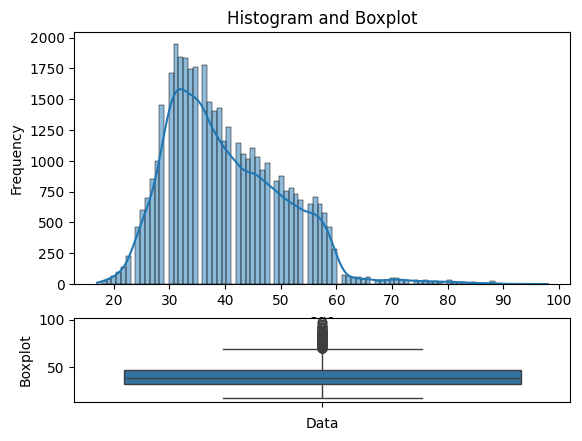

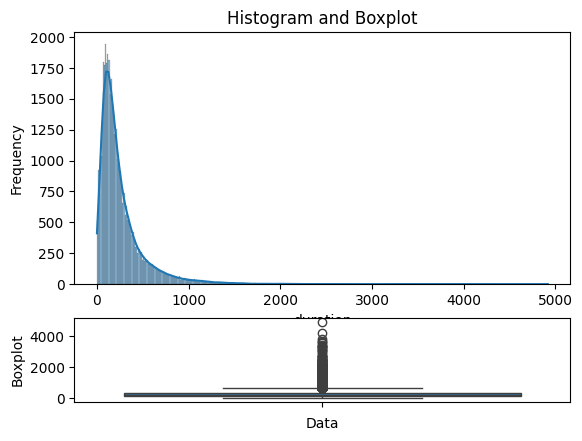

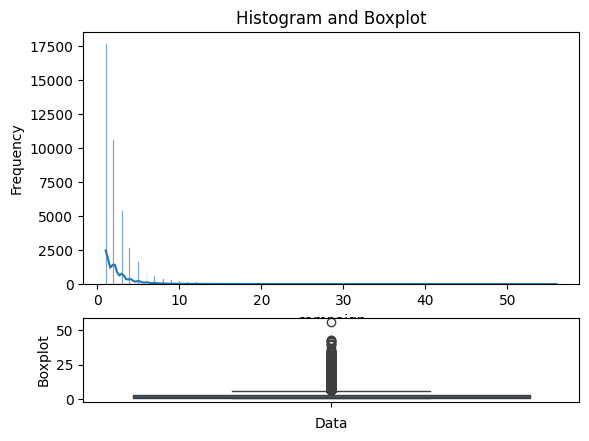

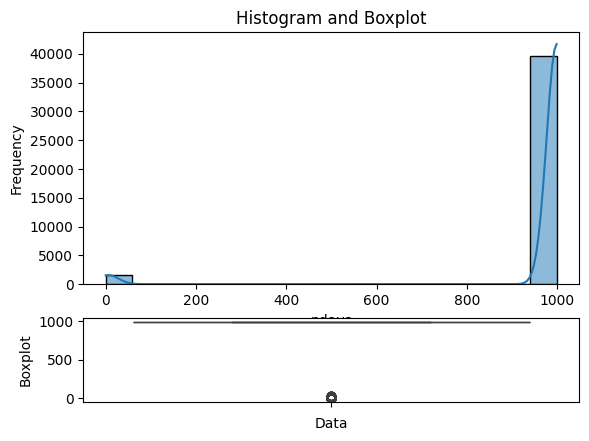

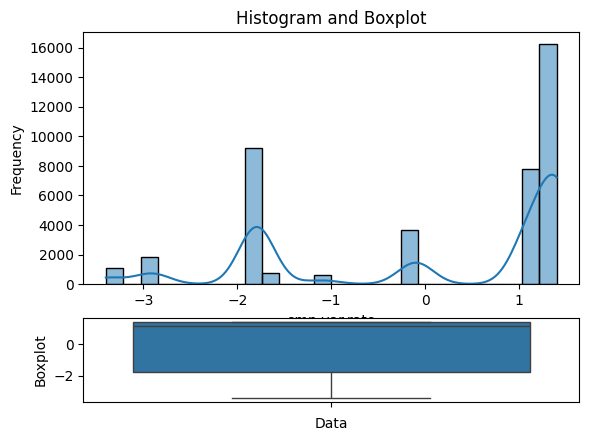

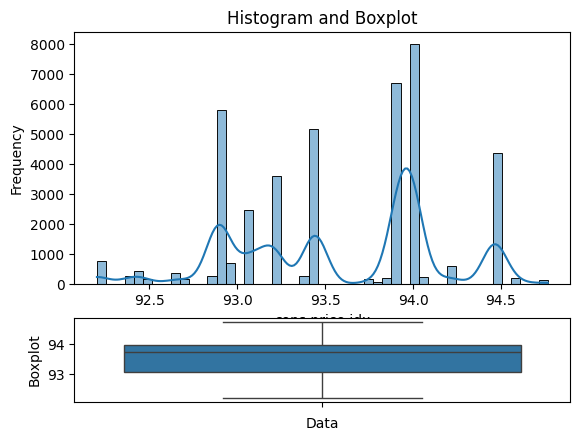

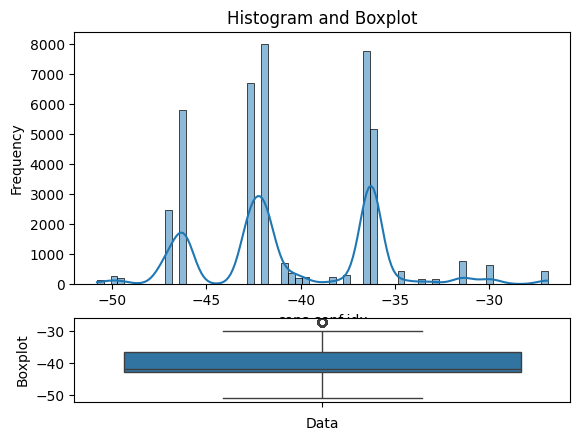

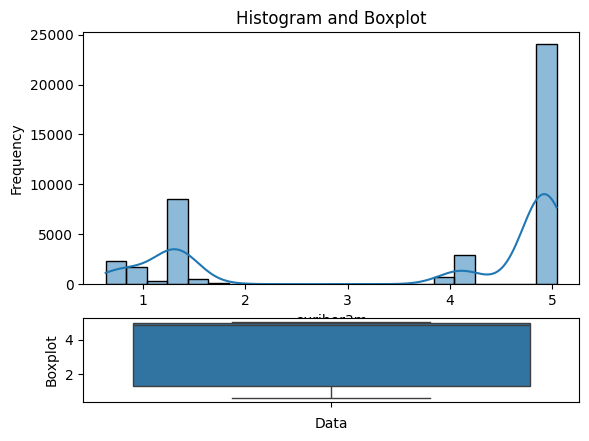

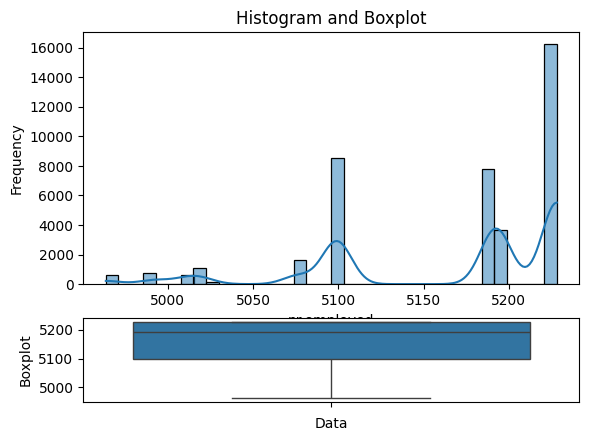

In [5]:
numerical_col = ["age","duration","campaign", "pdays","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]
for col in range(len(numerical_col)):
    print(f"EDA for the columns {numerical_col[col]}")
    print(df[numerical_col[col]].describe())
    print(f"Are there missing values for {numerical_col[col]}?")
    print(df[numerical_col[col]].isna().sum())
    q25 = df[numerical_col[col]].quantile(0.25)
    q75 = df[numerical_col[col]].quantile(0.75)
    IQR = q75-q25
    df[numerical_col[col]+"_lower_outliers"] = np.where(df[numerical_col[col]] <q25-3*IQR, 1, 0 )
    df[numerical_col[col]+"_upper_outliers"] = np.where(df[numerical_col[col]] <q75-3*IQR, 1, 0 )
    print(f"The coefficent of variations is {100*df[numerical_col[col]].std()/df[numerical_col[col]].mean()} %")

    #Figure and axis
    fig, (ax1, ax2) = plt.subplots(2,1, sharex= False, gridspec_kw={'height_ratios': [3,1]})

    sns.histplot(df[numerical_col[col]],kde=True,ax=ax1)
    ax1.set_title('Histogram and Boxplot')
    ax1.set_ylabel('Frequency')

    sns.boxplot(df[numerical_col[col]],ax=ax2)
    ax2.set_xlabel('Data')
    ax2.set_ylabel('Boxplot')


Transforming the data for visability 



In [6]:
df['campaign'].value_counts()
df['log_duration'] = np.log(df['duration']+0.001)
df['sqrt_duration'] = np.sqrt(df['duration']+0.001)
df['few_campaigns'] = np.where(df["campaign"]<12,1,0)
df['many_campaigns'] = np.where(df["campaign"]<28,1,0)
df['pdays'] = np.where(df['pdays']<999,1,0)
df['emp.var.rate'] = pd.cut(df['emp.var.rate'],[-4, -3, 0, 2])
quantiles = df["euribor3m"].quantile([0.25,0.5,0.75])
df["cat_euribor3m"] = pd.cut(df["euribor3m"], [-float("inf"), quantiles[0.25], quantiles[0.50], quantiles[0.75], float("inf")])

Numerical Features

In [7]:
numerical_features =["age","duration","campaign", "pdays","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",'age_lower_outliers', 'age_upper_outliers', 'duration_lower_outliers',
       'duration_upper_outliers', 'campaign_lower_outliers',
       'campaign_upper_outliers', 'pdays_lower_outliers',
       'pdays_upper_outliers', 'emp.var.rate_lower_outliers',
       'emp.var.rate_upper_outliers', 'cons.price.idx_lower_outliers',
       'cons.price.idx_upper_outliers', 'cons.conf.idx_lower_outliers',
       'cons.conf.idx_upper_outliers', 'euribor3m_lower_outliers',
       'euribor3m_upper_outliers','log_duration', 'sqrt_duration',
       'few_campaigns', 'many_campaigns']

Categorical Features

In [8]:
categorical_col = ["job","marital","education","default","housing","emp.var.rate","loan","contact","month","day_of_week","poutcome","cat_euribor3m"]
for col in range(len(categorical_col)):
    df[categorical_col[col]] = pd.Categorical(df[categorical_col[col]])

Text(0, 0.5, 'Boxplot')

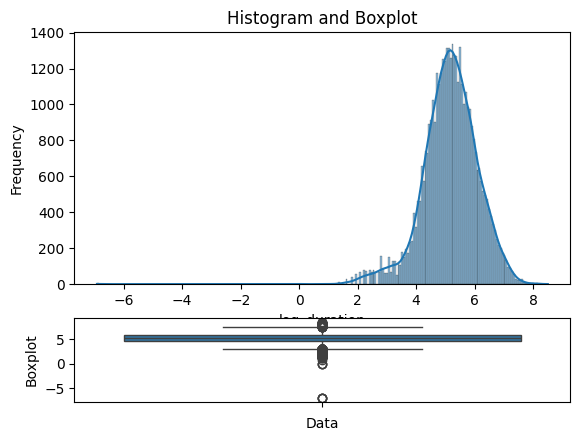

In [9]:

#Figure and axis
fig, (ax1, ax2) = plt.subplots(2,1, sharex= False, gridspec_kw={'height_ratios': [3,1]})

sns.histplot(df['log_duration'],kde=True,ax=ax1)
ax1.set_title('Histogram and Boxplot')
ax1.set_ylabel('Frequency')

sns.boxplot(df['log_duration'],ax=ax2)
ax2.set_xlabel('Data')
ax2.set_ylabel('Boxplot')


Design Matrix

In [10]:
df_yes = df.loc[df["y"]== 'yes']
df_no = df.loc[df["y"]== 'no'].sample(len(df_yes))

In [11]:
df_balanced = pd.concat([df_yes,df_no],axis =0)


In [12]:
df_balanced['y'].value_counts()

y
yes    4640
no     4640
Name: count, dtype: int64

In [13]:
X_num = df_balanced[numerical_features]
X_cat = df_balanced[categorical_col]


In [14]:
encoder = OneHotEncoder(max_categories=5,sparse_output=False, drop='first')
encoder.fit(df[categorical_col])
X_dummies = encoder.transform(X_cat)

In [15]:
X_final = np.c_[X_num, X_dummies]
Y_final = df_balanced["y"].values

Split train and test

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X_final,Y_final, test_size=0.2, random_state=12345)

In [17]:
X_train.shape

(7424, 61)

In [18]:
X_test.shape

(1856, 61)

First Model

In [19]:
model1 = LogisticRegression(penalty=None)
model1.fit(X_train,Y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

First Model Predictions

In [20]:
y_pred_train = model1.predict(X_train)
print(accuracy_score(y_pred_train,Y_train))


0.8507543103448276


In [21]:
y_pred_test = model1.predict(X_test)
print(accuracy_score(y_pred_test,Y_test))

0.8739224137931034


Second Model

In [22]:
model2 = LogisticRegression(penalty=None)
model2.fit(X_train,Y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

Second Model Predictions

y_pred_train = model1.predict(X_train)
print(accuracy_score(y_pred_train,Y_train))
y_pred_test = model1.predict(X_test)
print(accuracy_score(y_pred_test,Y_test))